In [2]:
import fund_en
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from schr import eigen

[0.04003203 0.04935834 0.06082725 0.07496252 0.09242144 0.11415525
 0.14044944 0.17361111 0.21367521 0.26455026 0.32467532 0.4       ]
[-0.17511161 -0.17853635 -0.17309978 -0.19145039 -0.18300462 -0.18312092
 -0.20330736 -0.19831176 -0.19689898 -0.20081609 -0.20555875 -0.21625966]
[0.013415   0.00876309 0.00677672 0.00528971 0.0093552  0.00590575
 0.00696485 0.0043748  0.00556118 0.00395136 0.0030964  0.00273214]
Example kwargs: 
{'a': '1',
 'b': '50',
 'd': '0.3',
 'f': '541',
 'g': '0.3',
 'p': '0.15',
 's': 'RANDOM',
 't': '500000'}


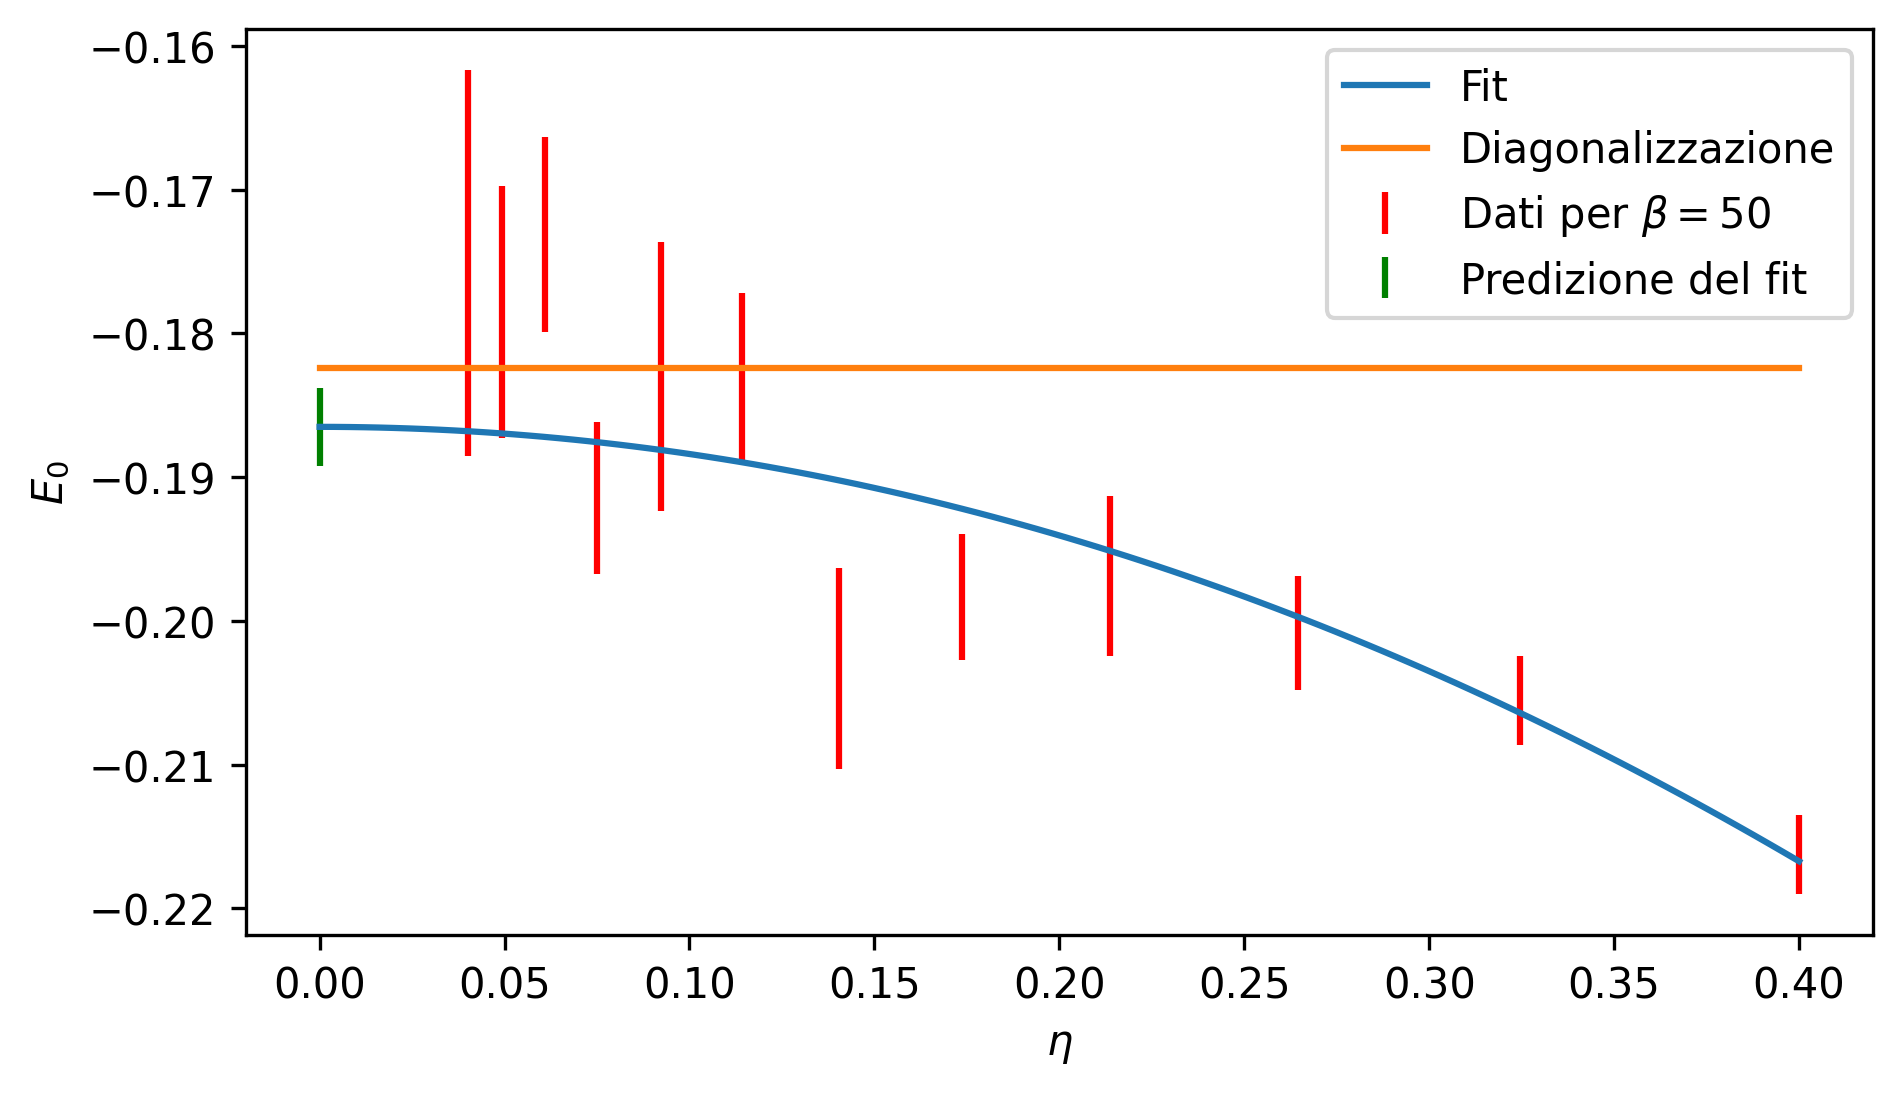

In [14]:
# Simulation
eneta = fund_en.EnEta('../sim_data/eneta_001')
params = {
    'b': 50,
    't': 500000,
    's': 'RANDOM',
    'd': 0.3,
    'a': 1, # Unless you really know what you are doing, set a=1
    'g': 0.3,
    'p': 0.15,
}
etas = np.geomspace(0.04, 0.4, 12)
plt.figure(figsize=(7,4), dpi=300)
#eneta.load(blocksize=4)
eneta.pipeline(etas, err_mult=1, blocksize=2000, resample=20, **params)
print(eneta.array_data['eta'])
print(eneta.array_data['energy'])
print(eneta.array_data['error'])

print("Example kwargs: ")
pprint(eneta.span.simulations[0].kwargs)
a = float(eneta.span.simulations[0].kwargs['a'])
g = float(eneta.span.simulations[0].kwargs['g'])

def potential(x, a, g):
    x2 = x*x
    return -a*x2+x2*x2*g

# Schr
e, ev = eigen(-8, 8, 2000, potential, [a, g], 2)

xx = np.linspace(0, np.max(eneta.array_data['eta']))
plt.plot(xx, len(xx)*[e[0]], label='Diagonalizzazione')
plt.errorbar(0,eneta.popt[0],np.sqrt(eneta.pcov[0][0]), fmt="none", ecolor="green", label='Predizione del fit')
plt.legend()
plt.ylabel('$E_0$')
plt.xlabel('$\\eta$')
plt.savefig('e_vs_eta.png')
plt.show()

In [12]:
print(eneta.popt, np.sqrt(np.diag(eneta.pcov)))
print(e[0])

fit_val = eneta.fit_func(eneta.array_data['eta'], *eneta.popt)
print(np.sum((fit_val-eneta.array_data['energy'])**2/eneta.array_data['error']**2)/(len(fit_val)-2))

[-0.18573261 -0.19464063] [0.00269203 0.02709654]
-0.18242258884372703
1.3799978953237333


In [29]:
enbeta = fund_en.EnBeta('../sim_data/enbeta_008/', 'b')
params = {
    't': 4000000,
    's': 'RANDOM',
    'd': 0.3,
    'a': 1, # Unless you really know what you are doing, set a=1
    'g': 0.3,
    'p': 0.15,
}
betas = np.geomspace(2, 20, 16)
etas = np.geomspace(0.02, 0.35, 14)
enbeta.run(betas, etas, **params)

EnBeta.run tqdm


100%|██████████| 16/16 [37:47:53<00:00, 8504.60s/it]   

EnBeta._load tqdm



16it [00:00, 19.44it/s]

Example kwargs: 
{   'a': '1',
    'b': '12.6191',
    'd': '0.3',
    'f': '506',
    'g': '0.3',
    'p': '0.15',
    's': 'RANDOM',
    't': '4000000'}


In [30]:
enbeta.load()

EnBeta.get_simulations tqdm


16it [1:21:08, 304.30s/it]


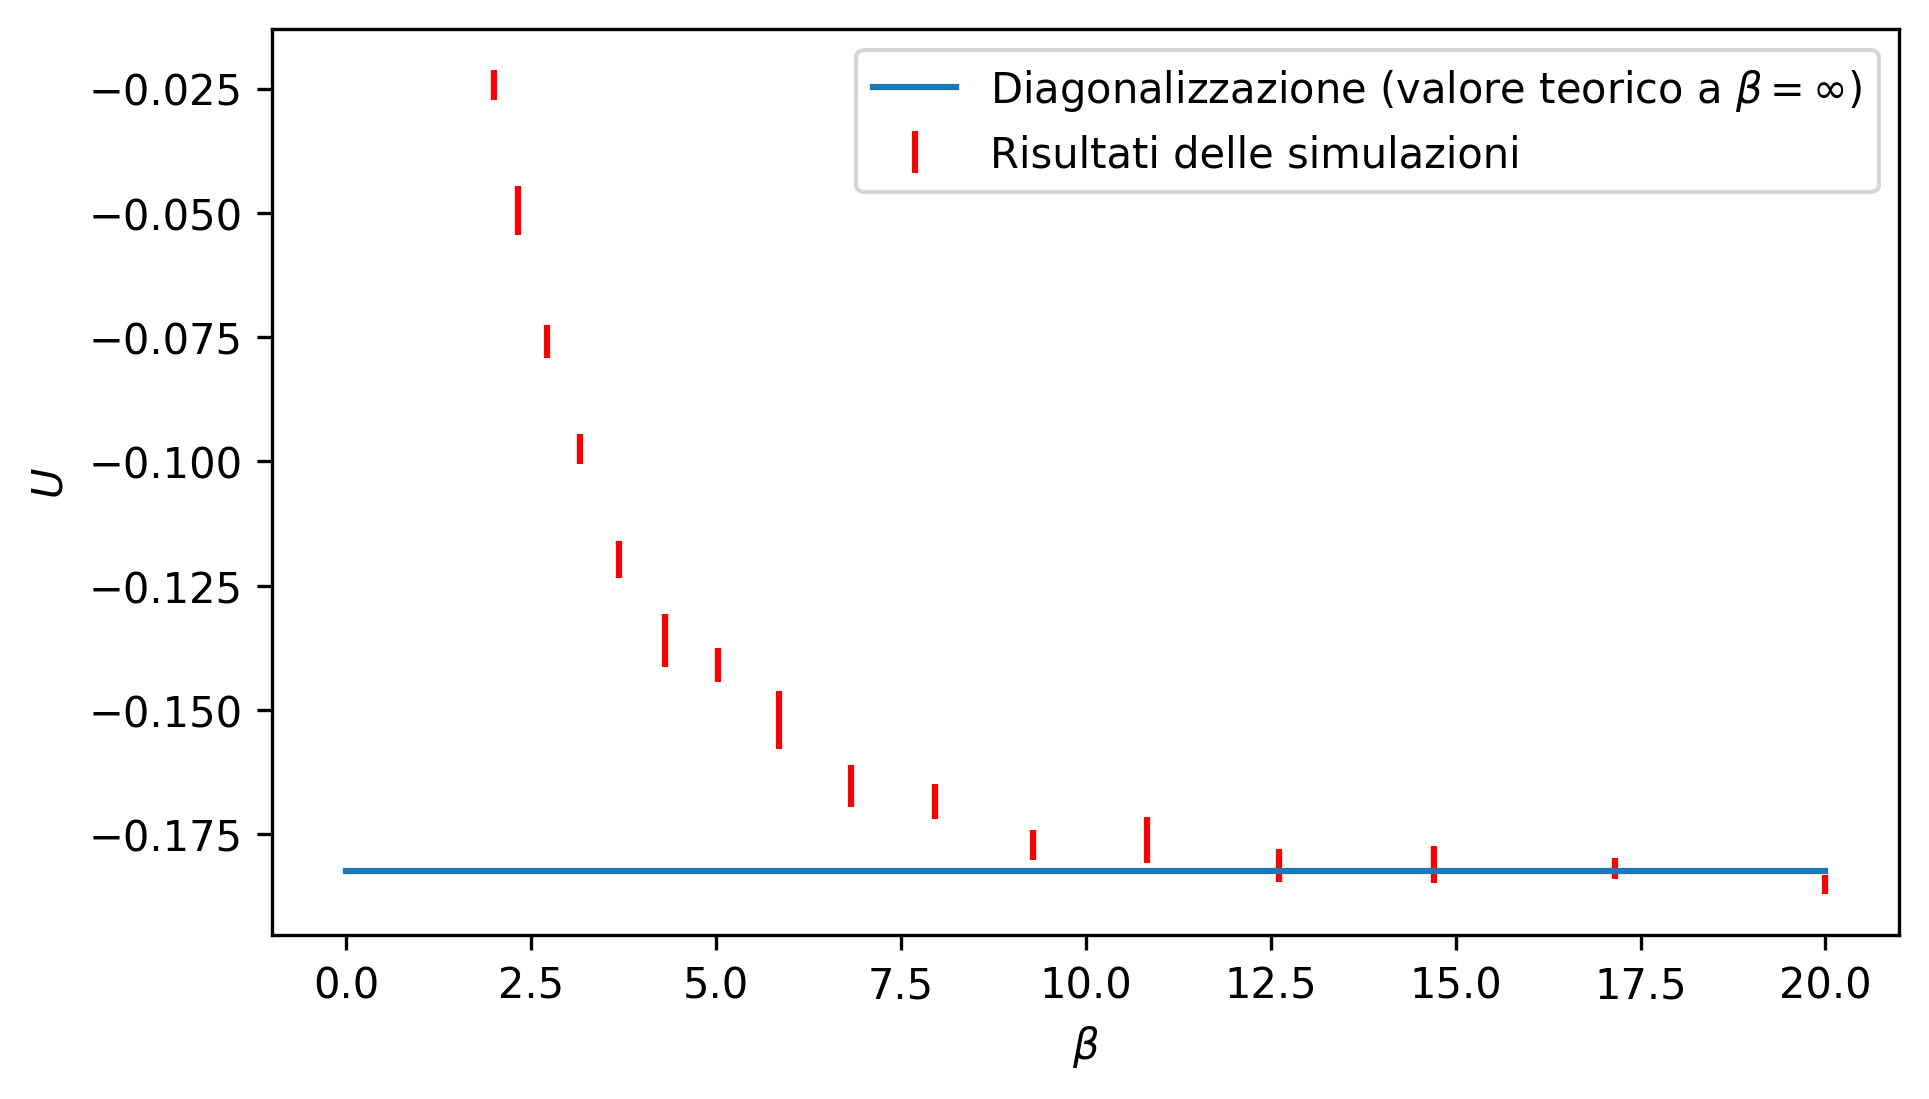

In [31]:
plt.figure(figsize=(7,4), dpi=300)
enbeta.plot()

a = float(enbeta.enetas[0].span.simulations[0].kwargs['a'])
g = float(enbeta.enetas[0].span.simulations[0].kwargs['g'])

def potential(x, a, g):
    x2 = x*x
    return -a*x2+x2*x2*g

# Schr
from schr import eigen
e, ev = eigen(-8, 8, 2000, potential, [a, g], 2)

xx = np.linspace(0, np.max(enbeta.array_data['key_value']))
plt.plot(xx, len(xx)*[e[0]], label='Diagonalizzazione (valore teorico a $\\beta=\\infty$)')
plt.xlabel('$\\beta$')
plt.ylabel('$U$')
plt.legend()
plt.savefig('e_vs_beta.png')

In [6]:
enzeta = fund_en.EnBeta('../sim_data/enzeta_001/', 'g')
params = {
    't': 300000,
    's': 'RANDOM',
    'd': 0.3,
    'a': 1, # Unless you really know what you are doing, set a=1
    'b': 40,
    'p': 0.15,
}
zetas = np.linspace(0.2, 1, 9)
etas = np.geomspace(0.04, 0.35, 8)
enzeta.run(zetas, etas, **params)

EnBeta._load tqdm


9it [00:00, 16.21it/s]

Example kwargs: 
{   'a': '1',
    'b': '40',
    'd': '0.3',
    'f': '212',
    'g': '0.8',
    'p': '0.15',
    's': 'RANDOM',
    't': '300000'}


In [7]:
enzeta.load()

EnBeta.get_simulations tqdm


9it [05:42, 38.06s/it]


In [8]:
plt.figure(figsize=(7,4), dpi=300)
enzeta.plot()

a = float(enzeta.enetas[0].span.simulations[0].kwargs['a'])
gg = []; th_e = []
for eneta in enzeta.enetas:
    g = float(eneta.span.simulations[0].kwargs['g'])
    gg.append(g)
    e, ev = eigen(-8, 8, 1000, potential, [a, g], 2)
    th_e.append(e[0])

def g_eigen(g):
    return eigen(-8, 8, 1000, potential, [a, g], 2)[0][0]

xx = np.linspace(np.min(gg), np.max(gg), 30)
ee = []
for g in xx:
    ee.append(g_eigen(g))
plt.plot(xx, ee, label='Diagonalizzazione')
plt.xlabel('$\\zeta$')
plt.ylabel('$E_0$')
plt.legend()
plt.savefig('e_vs_zeta.png')

In [17]:
print(np.sum((enzeta.array_data['popt0']-np.array(sorted(th_e)))**2/enzeta.array_data['error']**2)/len(th_e))

0.5812449930434771


In [ ]:
plt.figure(figsize=(7,4), dpi=300)

a = float(enzeta.enetas[0].span.simulations[0].kwargs['a'])
gg = []; th_e = []
for eneta in enzeta.enetas:
    g = float(eneta.span.simulations[0].kwargs['g'])
    gg.append(g)

plt.errorbar(
    enzeta.array_data['key_value'], 
    enzeta.array_data['popt0']+1/4.0/enzeta.array_data['key_value'], 
    enzeta.array_data['error']*1,
    fmt="none", ecolor="r", 
    label='Risultati delle simulazioni',
)

def g_eigen(g):
    return eigen(-8, 8, 1000, potential, [a, g], 2)[0][0]

xx = np.linspace(np.min(gg), np.max(gg), 30)
ee = []
for g in xx:
    ee.append(g_eigen(g)+1/4.0/g)
plt.plot(xx, ee, label='Diagonalizzazione')
plt.xlabel('$\\zeta$')
plt.ylabel('$E_0+1/4\\zeta$')
plt.legend()
plt.savefig('ec_vs_zeta.png')